### 1. 교통사고분석시스템(TAAS)에서 데이터 수집
    * 2014_19년 서울_경기 개별 교통사고 정보.xlsx
    * 서울시 개별사고정보(2007_2009).xlsx
    * 서울시 개별사고정보(2010_2018).xlsx

### 3. 분석 작업

In [100]:
import pandas as pd
import numpy as np

# Load Data
Seoul_0719 = pd.read_csv('서울시 개별사고정보(2007_2019).csv',  encoding="cp949")
Seoul_0719

,발생일,발생시간,요일,주야,발생지_시군구,법정동명,사고내용,사망자수,중상자수,경상자수,...,피해자성별,피해자연령,피해자신체상해정도,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월
0,20070101,00시,월,야,금천구,시흥동,중상,0,1,0,...,남,23,중상,0,1,0,0,0,2007,1
1,20070101,01시,월,야,동대문구,청량리동,중상,0,1,0,...,남,44,중상,0,1,0,0,0,2007,1
2,20070101,01시,월,야,마포구,서교동,중상,0,1,0,...,남,25,상해없음,0,1,5,0,0,2007,1
3,20070101,01시,월,야,강서구,화곡동,중상,0,1,0,...,남,19,중상,0,1,0,0,0,2007,1
4,20070101,01시,월,야,송파구,가락동,경상,0,0,1,...,여,43,경상,0,2,3,0,0,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492932,20191231,22시,화,야,동작구,상도동,중상,0,1,0,...,남,54,중상,0,1,0,0,0,2019,12
492933,20191231,22시,화,야,중랑구,면목동,부상신고,0,0,0,...,여,33,부상신고,0,3,1,0,0,2019,12
492934,20191231,22시,화,야,강남구,삼성동,경상,0,0,1,...,여,61,경상,0,2,0,0,0,2019,12
492935,20191231,22시,화,야,송파구,송파동,경상,0,0,1,...,여,18,경상,0,2,0,0,0,2019,12


In [8]:
Seoul_0719.iloc[0:, 2]

0         월
1         월
2         월
3         월
4         월
         ..
492932    화
492933    화
492934    화
492935    화
492936    화
Name: 요일, Length: 492937, dtype: object

In [3]:
Seoul_0719.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492937 entries, 0 to 492936
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        492937 non-null  int64 
 1   발생시간       492937 non-null  object
 2   요일         492937 non-null  object
 3   주야         492937 non-null  object
 4   발생지_시군구    492937 non-null  object
 5   법정동명       492849 non-null  object
 6   사고내용       492937 non-null  object
 7   사망자수       492937 non-null  int64 
 8   중상자수       492937 non-null  int64 
 9   경상자수       492937 non-null  int64 
 10  부상신고자수     492937 non-null  int64 
 11  사고유형_대분류   492937 non-null  object
 12  사고유형_중분류   492937 non-null  object
 13  사고유형       492937 non-null  object
 14  가해자법규위반    492936 non-null  object
 15  노면상태_대분류   492937 non-null  object
 16  노면상태       492937 non-null  object
 17  기상상태       492937 non-null  object
 18  도로형태_대분류   492937 non-null  object
 19  도로형태       492937 non-null  object
 20  가해자차

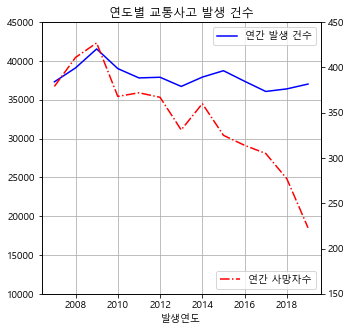

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rc('figure', figsize=(5, 5))

Seoul_0719.groupby('발생연도').size().plot.line(title='연도별 교통사고 발생 건수', color='blue', grid=True)
plt.ylim(10000, 45000)
plt.legend(['연간 발생 건수'])
Seoul_0719.groupby('발생연도')['사망자수'].sum().plot.line(linestyle='-.',
                                              secondary_y=True, color='red', grid=True)
plt.ylim(150, 450)
plt.legend(['연간 사망자수'], loc='lower right')
plt.show()
# Seoul_0719.groupby('발생연도')['사망자수'].sum() # 연도별 사망자수 계산

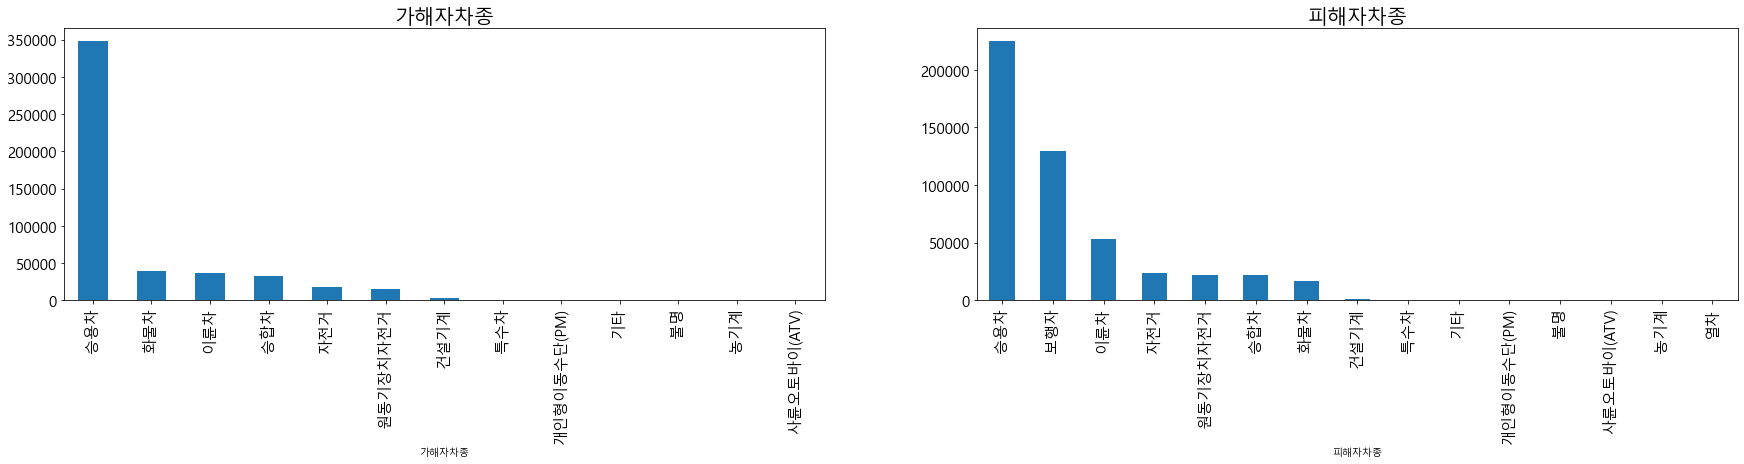

In [12]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
Seoul_0719.groupby(Seoul_0719['가해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('가해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
Seoul_0719.groupby(Seoul_0719['피해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('피해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

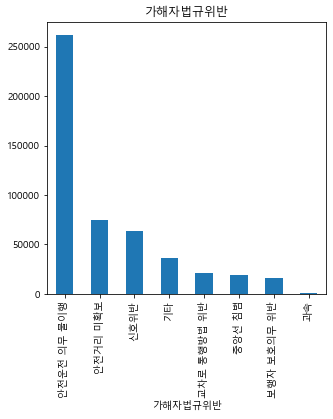

In [13]:
Seoul_0719.groupby(Seoul_0719['가해자법규위반']).size().sort_values(ascending=False).plot(kind='bar', title='가해자법규위반')

In [15]:
Seoul_0719.describe()

,사망자수,중상자수,경상자수,부상신고자수,가해자연령,피해자연령,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월
count,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000,492937.000000
mean,0.009046,0.373857,0.959459,0.102739,45.456040,43.367116,0.508791,1.709330,0.776257,1.268779,0.349704,2012.918547,6.682047
std,0.096608,0.594592,1.031594,0.409471,14.507636,16.134034,0.499923,0.581468,1.440980,0.760782,1.088441,3.733694,3.384653
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2007.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,34.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2010.000000,4.000000
50%,0.000000,0.000000,1.000000,0.000000,47.000000,44.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2013.000000,7.000000
75%,0.000000,1.000000,1.000000,0.000000,56.000000,55.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2016.000000,10.000000
max,4.000000,21.000000,41.000000,49.000000,117.000000,117.000000,1.000000,3.000000,12.000000,6.000000,7.000000,2019.000000,12.000000


In [8]:
Seoul_0719.groupby('가해자차종').size()

가해자차종
개인형이동수단(PM)       200
건설기계             2418
기타                150
농기계                28
불명                148
사륜오토바이(ATV)        26
승용차            347521
승합차             32422
원동기장치자전거        15363
이륜차             36656
자전거             17264
특수차               983
화물차             39758
dtype: int64

In [5]:
Seoul_0719.groupby('주야')['사망자수'].size()

주야
야    242135
주    250802
Name: 사망자수, dtype: int64

In [12]:
Seoul_0719['사망자수'].sum()

4459

In [13]:
Seoul_0719.quantile(0.5)

사망자수       0.0
중상자수       0.0
경상자수       1.0
부상신고자수     0.0
가해자연령     47.0
피해자연령     44.0
Name: 0.5, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2415058e730>,
 'caps': [<matplotlib.lines.Line2D at 0x2415058e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2415058ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x2414ec8d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2414ec8d580>],
 'means': []}

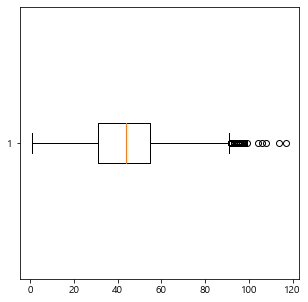

In [14]:
plt.boxplot(Seoul_0719['피해자연령'], vert=False)

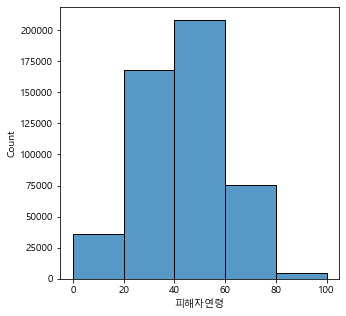

In [15]:
#plt.figure(figsize=(15,8))
sns.histplot(x='피해자연령', data=Seoul_0719, bins=[0, 20, 40, 60, 80, 100])

In [68]:
# 안쓰는거
from scipy.stats import chisquare
num_class = Seoul_0719["사고내용코드"].value_counts()
print(num_class)
chisquare(num_class)

2    297750
1    162672
3     28140
0      4375
Name: 사고내용코드, dtype: int64


Power_divergenceResult(statistic=447777.4710906262, pvalue=0.0)

In [16]:
Seoul_0719[Seoul_0719['사고내용']=='사망']

,발생일,발생시간,요일,주야,발생지_시군구,법정동명,사고내용,사망자수,중상자수,경상자수,...,도로형태_대분류,도로형태,가해자차종,가해자성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
34,20070101,19시,월,야,관악구,봉천동,사망,1,0,1,...,단일로,기타단일로,이륜차,남,16,사망,승용차,남,40,경상
127,20070102,22시,화,야,강남구,일원동,사망,1,0,0,...,교차로,교차로내,승합차,남,41,상해없음,보행자,남,12,사망
149,20070103,06시,수,주,광진구,광장동,사망,1,0,0,...,교차로,교차로부근,승용차,남,75,상해없음,보행자,여,77,사망
512,20070107,00시,일,야,도봉구,방학동,사망,1,0,0,...,교차로,교차로내,원동기장치자전거,남,48,사망,승용차,남,51,상해없음
591,20070108,09시,월,주,광진구,광장동,사망,1,0,0,...,단일로,횡단보도상,승용차,남,38,상해없음,보행자,남,69,사망
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492468,20191226,16시,목,주,은평구,진관동,사망,1,0,0,...,교차로,교차로내,승용차,남,60,상해없음,이륜차,남,23,사망
492746,20191229,23시,일,야,동대문구,휘경동,사망,1,0,0,...,단일로,기타단일로,승용차,남,63,상해없음,보행자,여,66,사망
492751,20191230,00시,월,야,관악구,봉천동,사망,1,0,0,...,단일로,기타단일로,승용차,남,74,기타불명,보행자,남,84,사망
492848,20191231,01시,화,야,서초구,반포동,사망,1,0,0,...,단일로,기타단일로,승용차,남,34,상해없음,이륜차,남,39,사망


In [23]:
pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
가해자차종,,,,
개인형이동수단(PM),105,39,1,55
건설기계,1285,71,144,918
기타,70,27,3,50
농기계,9,9,0,10
불명,64,18,4,62
사륜오토바이(ATV),14,6,0,6
승용차,221128,12682,2144,111567
승합차,17794,1278,627,12723
원동기장치자전거,7758,2442,204,4959


In [24]:
pd.crosstab(Seoul_0719['주야'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
주야,,,,
야,146650,13095,2448,79942
주,151100,15045,1927,82730


In [25]:
pd.crosstab(Seoul_0719['노면상태'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
노면상태,,,,
건조,259752,25078,3659,141071
기타,4937,435,69,2539
서리/결빙,1780,118,20,841
적설,936,52,14,468
젖음/습기,30340,2457,613,17750
침수,4,0,0,1
해빙,1,0,0,2


In [42]:
pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사고내용']).sum(axis=1)

가해자차종
개인형이동수단(PM)       200
건설기계             2418
기타                150
농기계                28
불명                148
사륜오토바이(ATV)        26
승용차            347521
승합차             32422
원동기장치자전거        15363
이륜차             36656
자전거             17264
특수차               983
화물차             39758
dtype: int64

In [43]:
pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
가해자차종,,,,
개인형이동수단(PM),105,39,1,55
건설기계,1285,71,144,918
기타,70,27,3,50
농기계,9,9,0,10
불명,64,18,4,62
사륜오토바이(ATV),14,6,0,6
승용차,221128,12682,2144,111567
승합차,17794,1278,627,12723
원동기장치자전거,7758,2442,204,4959


In [50]:
pd.crosstab(Seoul_0719['사고유형_대분류'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
사고유형_대분류,,,,
차대사람,61197,6778,2729,58618
차대차,236550,21361,1646,104051
차량단독,1,1,0,2
철길건널목,2,0,0,1


In [49]:
Seoul_0719.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492937 entries, 0 to 492936
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        492937 non-null  int64 
 1   발생시간       492937 non-null  object
 2   요일         492937 non-null  object
 3   주야         492937 non-null  object
 4   발생지_시군구    492937 non-null  object
 5   법정동명       492849 non-null  object
 6   사고내용       492937 non-null  object
 7   사망자수       492937 non-null  int64 
 8   중상자수       492937 non-null  int64 
 9   경상자수       492937 non-null  int64 
 10  부상신고자수     492937 non-null  int64 
 11  사고유형_대분류   492937 non-null  object
 12  사고유형_중분류   492937 non-null  object
 13  사고유형       492937 non-null  object
 14  가해자법규위반    492936 non-null  object
 15  노면상태_대분류   492937 non-null  object
 16  노면상태       492937 non-null  object
 17  기상상태       492937 non-null  object
 18  도로형태_대분류   492937 non-null  object
 19  도로형태       492937 non-null  object
 20  가해자차

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A433281F0>,
      dtype=object)

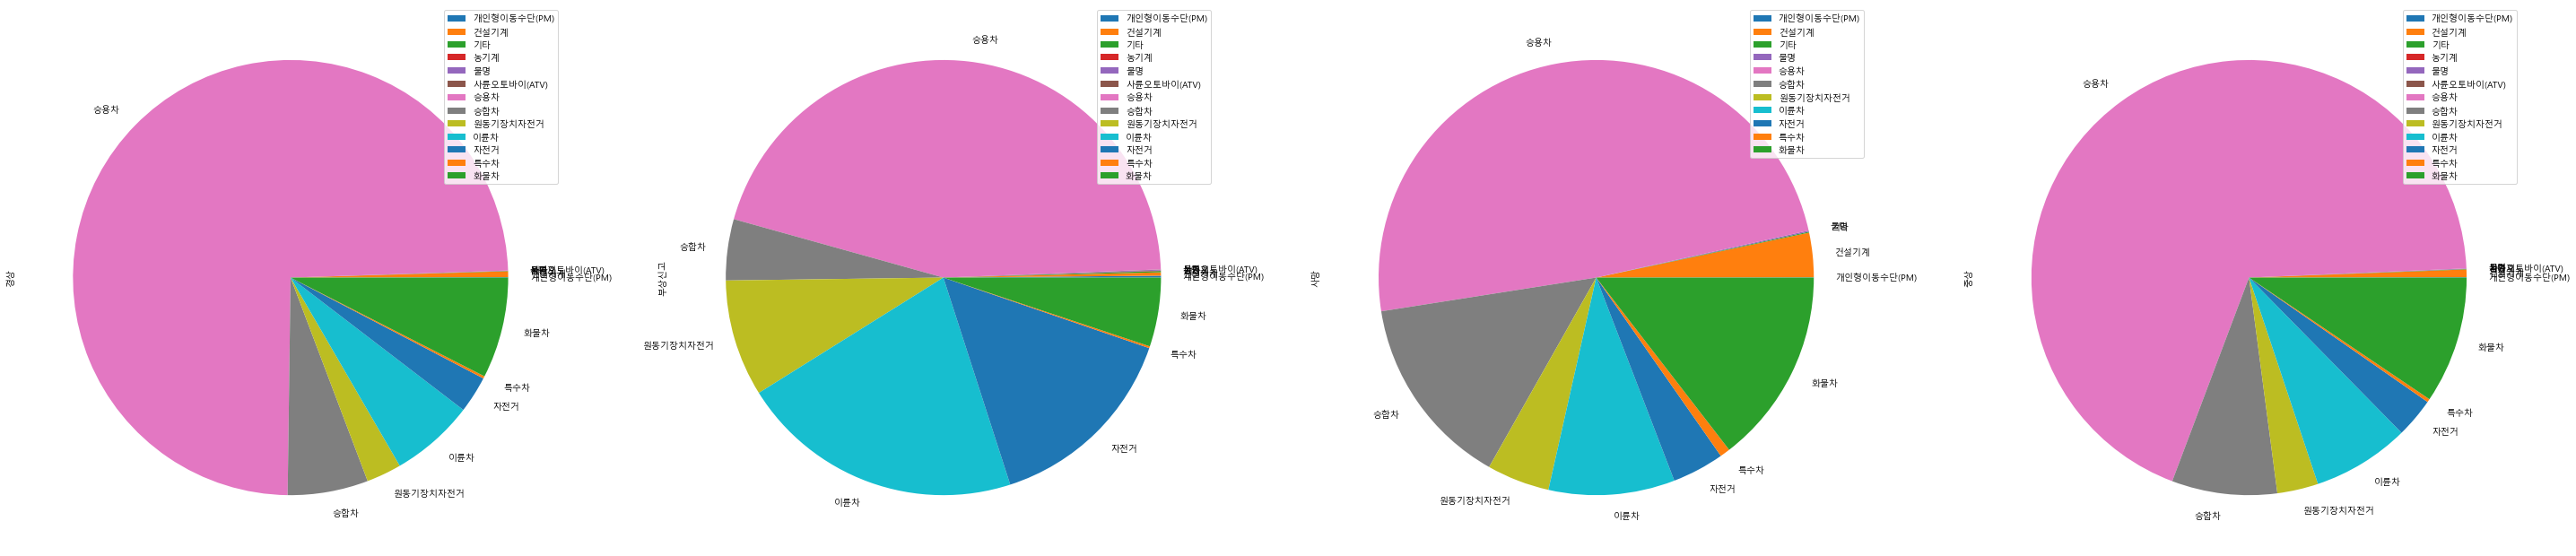

In [21]:
ct = pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사고내용'])
ct.plot.pie(subplots=True, figsize=(50, 50))

In [71]:
Seoul_0719.groupby(['발생연도', '발생월', '주야'])['사망자수'].sum()

발생연도  발생월  주야
2007  1    야      6
           주     20
      2    야     12
           주     15
      3    야     13
                 ..
2019  10   주     12
      11   야      9
           주      3
      12   야     14
           주      7
Name: 사망자수, Length: 312, dtype: int64

In [ ]:
sns.pairplot(Seoul_0719, hue='주야코드')

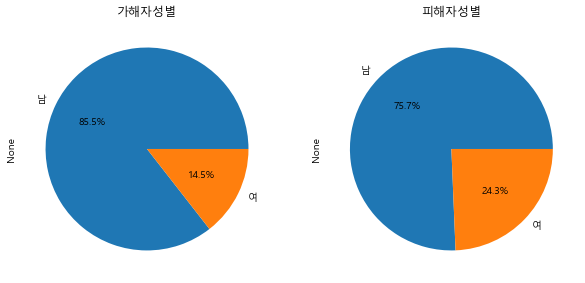

In [3]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
Seoul_0719.groupby(Seoul_0719['가해자성별']).size().sort_values(ascending=False).plot(kind='pie', title='가해자성별', autopct='%.1f%%')
plt.subplot(1, 2, 2)
Seoul_0719.groupby(Seoul_0719['피해자성별']).size().sort_values(ascending=False).plot(kind='pie', title='피해자성별', autopct='%.1f%%')
plt.show()

In [7]:
Seoul_0719['피해자성별']

0         남
1         남
2         남
3         남
4         여
         ..
492932    남
492933    여
492934    여
492935    여
492936    남
Name: 피해자성별, Length: 492937, dtype: object

In [8]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대사람']['피해자성별']

1         남
6         여
7         여
11        남
14        남
         ..
492926    여
492930    여
492931    여
492933    여
492935    여
Name: 피해자성별, Length: 129322, dtype: object

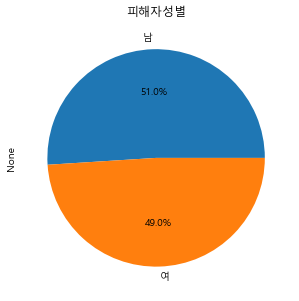

In [17]:
Seoul_0719.groupby(Seoul_0719[Seoul_0719['사고유형_대분류'] != '차대차']['피해자성별']).size().plot(kind='pie', title='피해자성별', autopct='%.1f%%')

In [19]:
Seoul_0719['가해자법규위반']

0                신호위반
1         안전운전 의무 불이행
2              중앙선 침범
3         안전운전 의무 불이행
4         안전운전 의무 불이행
             ...     
492932    안전운전 의무 불이행
492933    안전운전 의무 불이행
492934       안전거리 미확보
492935    보행자 보호의무 위반
492936    교차로 통행방법 위반
Name: 가해자법규위반, Length: 492937, dtype: object

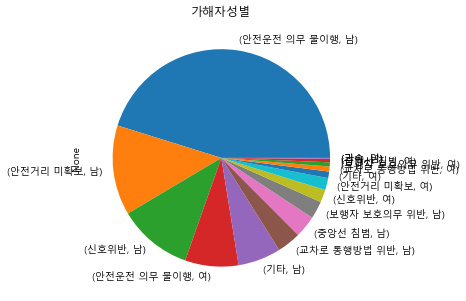

In [30]:
Seoul_0719.groupby(['가해자법규위반', '가해자성별']).size().sort_values(ascending=False).plot(kind='pie', title='가해자성별')

In [37]:
Seoul_0719.groupby('가해자성별').size()

가해자성별
남    421686
여     71251
dtype: int64

In [36]:
Seoul_0719.groupby(['가해자법규위반', '가해자성별']).size()

가해자법규위반      가해자성별
과속           남           673
             여            31
교차로 통행방법 위반  남         17566
             여          3694
기타           남         31425
             여          4753
보행자 보호의무 위반  남         12875
             여          3037
신호위반         남         54508
             여          9333
안전거리 미확보     남         65886
             여          8778
안전운전 의무 불이행  남        222713
             여         39129
중앙선 침범       남         16039
             여          2496
dtype: int64

In [44]:
Seoul_0719.groupby(['가해자법규위반', '가해자성별']).size()

가해자법규위반      가해자성별
과속           남           673
             여            31
교차로 통행방법 위반  남         17566
             여          3694
기타           남         31425
             여          4753
보행자 보호의무 위반  남         12875
             여          3037
신호위반         남         54508
             여          9333
안전거리 미확보     남         65886
             여          8778
안전운전 의무 불이행  남        222713
             여         39129
중앙선 침범       남         16039
             여          2496
dtype: int64

In [22]:
from scipy.stats import levene, ttest_ind

daytime = Seoul_0719[Seoul_0719['주야'] == "주"]
nighttime = Seoul_0719[Seoul_0719['주야'] == "야"]
levene(daytime[daytime['사고내용코드'] == 0], nighttime[nighttime['사고내용코드'] == 0])

ValueError: Samples must be one-dimensional.

In [164]:
daytime

,발생일,발생시간,요일,주야,발생지_시군구,법정동명,사고내용,사망자수,중상자수,경상자수,...,피해자성별,피해자연령,피해자신체상해정도,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월
17,20070101,07시,월,주,동대문구,장안동,중상,0,1,0,...,남,37,중상,1,1,0,1,0,2007,1
18,20070101,07시,월,주,송파구,송파동,경상,0,0,2,...,남,43,경상,1,2,0,1,0,2007,1
19,20070101,08시,월,주,노원구,월계동,경상,0,0,1,...,남,41,경상,1,2,0,1,0,2007,1
20,20070101,10시,월,주,영등포구,여의도동,경상,0,0,1,...,남,31,경상,1,2,0,1,0,2007,1
21,20070101,11시,월,주,강동구,고덕동,중상,0,1,0,...,남,49,중상,1,1,0,1,0,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492898,20191231,16시,화,주,양천구,목동,경상,0,0,1,...,남,25,경상,1,2,0,1,0,2019,12
492899,20191231,16시,화,주,송파구,석촌동,경상,0,0,1,...,남,25,경상,1,2,0,1,0,2019,12
492900,20191231,16시,화,주,서초구,서초동,중상,0,1,0,...,남,57,중상,1,1,0,1,0,2019,12
492901,20191231,17시,화,주,송파구,가락동,경상,0,0,1,...,여,45,경상,1,2,0,1,0,2019,12


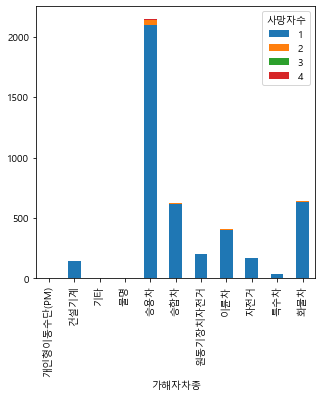

In [144]:
ct = pd.crosstab(Seoul_0719[Seoul_0719['사망자수'] >= 1]['가해자차종'], Seoul_0719[Seoul_0719['사망자수'] >= 1]['사망자수'])
ct.plot.bar(stacked=True)   # seaborn lib

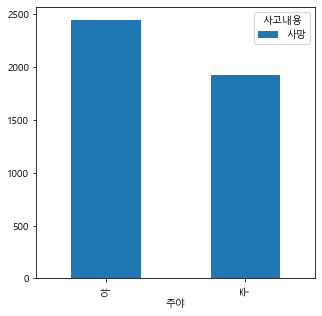

In [151]:
ct = pd.crosstab(Seoul_0719[Seoul_0719['사망자수'] >= 1]['주야'], Seoul_0719[Seoul_0719['사망자수'] >= 1]['사고내용'])
ct.plot.bar(stacked=True)

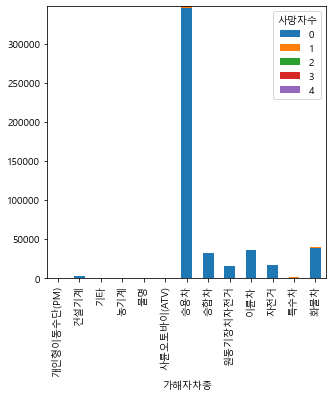

In [142]:
ct = pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사망자수'])
ct.plot.bar(stacked=True) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EB389A970>,
      dtype=object)

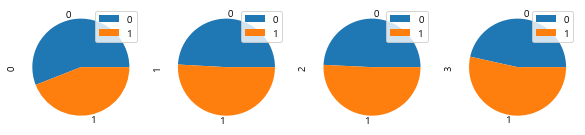

In [94]:
ct = pd.crosstab(Seoul_0719['주야코드'], Seoul_0719['사고내용코드'])
ct.plot.pie(subplots=True, figsize=((10, 10)))

In [141]:
from scipy import stats
stats.chi2_contingency(ct) # 2번째 값이 p value

(12.523240759316282,
 0.9979054012420726,
 30,
 array([[9.82171429e-01, 1.66857143e-02, 9.14285714e-04, 2.28571429e-04],
        [1.41432686e+02, 2.40274286e+00, 1.31657143e-01, 3.29142857e-02],
        [2.94651429e+00, 5.00571429e-02, 2.74285714e-03, 6.85714286e-04],
        [3.92868571e+00, 6.67428571e-02, 3.65714286e-03, 9.14285714e-04],
        [2.10577554e+03, 3.57741714e+01, 1.96022857e+00, 4.90057143e-01],
        [6.15821486e+02, 1.04619429e+01, 5.73257143e-01, 1.43314286e-01],
        [2.00362971e+02, 3.40388571e+00, 1.86514286e-01, 4.66285714e-02],
        [4.02690286e+02, 6.84114286e+00, 3.74857143e-01, 9.37142857e-02],
        [1.65986971e+02, 2.81988571e+00, 1.54514286e-01, 3.86285714e-02],
        [3.24116571e+01, 5.50628571e-01, 3.01714286e-02, 7.54285714e-03],
        [6.24661029e+02, 1.06121143e+01, 5.81485714e-01, 1.45371429e-01]]))

In [28]:
Seoul_0719['사망자수'].sum()

4459

In [43]:
pd.crosstab(Seoul_0719['주야'], Seoul_0719['사고내용'], normalize=True)

사고내용,경상,부상신고,사망,중상
주야,,,,
야,0.297503,0.026565,0.004966,0.162175
주,0.306530,0.030521,0.003909,0.167831


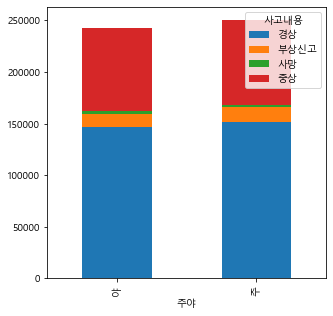

In [44]:
ct = pd.crosstab(Seoul_0719['주야'], Seoul_0719['사고내용'])
ct.plot.bar(stacked=True)   # seaborn lib

In [121]:
from scipy import stats
stats.chi2_contingency(ct) # 2번째 값이 p value

(159.12445448727618,
 2.831889267473299e-34,
 3,
 array([[146257.42488391,  13822.61607467,   2149.03856882,
          79905.9204726 ],
        [151492.57511609,  14317.38392533,   2225.96143118,
          82766.0795274 ]]))

In [174]:
Seoul_0719.groupby('기상상태')['사망자수'].sum()

기상상태
기타/불명      22
눈          30
맑음       3630
비         400
안개          2
흐림        375
Name: 사망자수, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


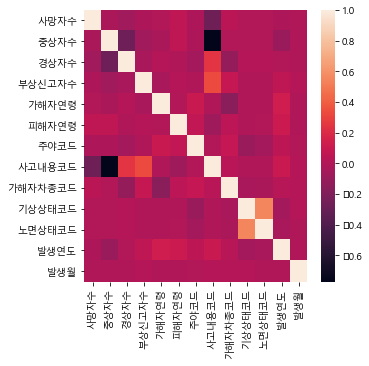

In [23]:
sns.heatmap(Seoul_0719.corr())

In [165]:
Seoul_0719.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492937 entries, 0 to 492936
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        492937 non-null  object
 1   발생시간       492937 non-null  object
 2   요일         492937 non-null  object
 3   주야         492937 non-null  object
 4   발생지_시군구    492937 non-null  object
 5   법정동명       492849 non-null  object
 6   사고내용       492937 non-null  object
 7   사망자수       492937 non-null  int64 
 8   중상자수       492937 non-null  int64 
 9   경상자수       492937 non-null  int64 
 10  부상신고자수     492937 non-null  int64 
 11  사고유형_대분류   492937 non-null  object
 12  사고유형_중분류   492937 non-null  object
 13  사고유형       492937 non-null  object
 14  가해자법규위반    492936 non-null  object
 15  노면상태_대분류   492937 non-null  object
 16  노면상태       492937 non-null  object
 17  기상상태       492937 non-null  object
 18  도로형태_대분류   492937 non-null  object
 19  도로형태       492937 non-null  object
 20  가해자차

In [ ]:
Seoul_0719.groupby('사고유형_대분류')['사망자수'].sum().plot.bar(x=x-1, color='red', grid=True)
plt.legend(['연간 사망자수'], loc='lower right')
plt.show()

In [16]:
Seoul_0719.groupby('사고유형_대분류')['사망자수'].sum().value_counts(normalize=True)

0       0.50
2749    0.25
1710    0.25
Name: 사망자수, dtype: float64

In [51]:
Seoul_0719.groupby('가해자차종').sum()

,발생일,사망자수,중상자수,경상자수,부상신고자수,가해자연령,피해자연령,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월
가해자차종,,,,,,,,,,,,,,
개인형이동수단(PM),4037180250,1,56,115,42,6544,9111,121,382,1600,24,65,403701,1671
건설기계,48697497700,145,1077,2231,194,117368,116975,2081,3701,14508,400,602,4869581,16493
기타,3023375430,3,52,83,30,7989,7141,101,271,1350,34,27,302327,1031
농기계,563770245,0,10,9,9,1691,1431,18,55,308,9,6,56375,198
불명,2980073536,4,67,68,22,8083,6951,77,244,1480,55,55,297997,1011
사륜오토바이(ATV),524755981,0,6,22,6,1216,1293,17,52,312,2,2,52474,157
승용차,6995318758234,2197,127387,359834,28095,16309488,14848877,165028,591869,0,99024,127469,699508243,2308210
승합차,652582932767,637,14908,31679,3486,1606332,1450897,19415,52145,97266,8479,10814,65256075,216682
원동기장치자전거,309156449696,209,5361,9807,3122,499708,663318,7514,27801,76815,3396,4683,30914576,104475


In [78]:
import numpy as np

mx_1 = np.array(Seoul_0719.groupby('가해자차종').sum()['사망자수'])
mx_2 = np.array(Seoul_0719.groupby('가해자차종').size())
#li_1 = list(Seoul_0719.groupby('가해자차종').sum()['사망자수'])
#li_2 = list(Seoul_0719.groupby('가해자차종').size())


mx_re = (mx_1 / mx_2) * 100
mx_re

array([0.5       , 5.99669148, 2.        , 0.        , 2.7027027 ,
       0.        , 0.63219201, 1.96471532, 1.36041138, 1.14033173,
       0.97891566, 3.35707019, 1.61728457])

In [68]:
Seoul_0719.groupby('가해자차종').sum()['사망자수']

가해자차종
개인형이동수단(PM)       1
건설기계            145
기타                3
농기계               0
불명                4
사륜오토바이(ATV)       0
승용차            2197
승합차             637
원동기장치자전거        209
이륜차             418
자전거             169
특수차              33
화물차             643
Name: 사망자수, dtype: int64

In [60]:
Seoul_0719.groupby('가해자차종').size()

가해자차종
개인형이동수단(PM)       200
건설기계             2418
기타                150
농기계                28
불명                148
사륜오토바이(ATV)        26
승용차            347521
승합차             32422
원동기장치자전거        15363
이륜차             36656
자전거             17264
특수차               983
화물차             39758
dtype: int64

In [71]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대차'].groupby('사고유형_중분류').sum()['사망자수']


사고유형_중분류
기타       351
정면충돌     253
추돌       346
측면충돌     760
후진중충돌      0
Name: 사망자수, dtype: int64

In [72]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대차'].groupby('사고유형_중분류').size()

사고유형_중분류
기타        70532
정면충돌      16353
추돌       110393
측면충돌     165130
후진중충돌      1200
dtype: int64

In [74]:
mx_1 = np.array(Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대사람'].groupby('사고유형_중분류').sum()['사망자수'])
mx_2 = np.array(Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대사람'].groupby('사고유형_중분류').size())
#li_1 = list(Seoul_0719.groupby('가해자차종').sum()['사망자수'])
#li_2 = list(Seoul_0719.groupby('가해자차종').size())

mx_re = (mx_1 / mx_2) * 100
mx_re

tmp_dict = {'mx_1':mx_1, 'mx_2':mx_2, 'mx_re':mx_re}
df_temp = pd.DataFrame(tmp_dict)
df_temp

,mx_1,mx_2,mx_re
0,694,44703,1.552469
1,74,9642,0.767476
2,115,8186,1.404838
3,337,13433,2.508747
4,1529,53358,2.865550


In [75]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대사람'].groupby('사고유형_중분류').sum()['사망자수']

사고유형_중분류
기타             694
길가장자리구역통행중      74
보도통행중          115
차도통행중          337
횡단중           1529
Name: 사망자수, dtype: int64

In [96]:
Seoul_0719[Seoul_0719['사고내용'] == '사망']['사고내용']

34        사망
127       사망
149       사망
512       사망
591       사망
          ..
492468    사망
492746    사망
492751    사망
492848    사망
492856    사망
Name: 사고내용, Length: 4375, dtype: object

In [106]:
ct = pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사망여부'])

In [107]:
ct

사망여부,0,1
가해자차종,,
개인형이동수단(PM),1,199
건설기계,144,2274
기타,3,147
농기계,0,28
불명,4,144
사륜오토바이(ATV),0,26
승용차,2144,345377
승합차,627,31795
원동기장치자전거,204,15159


In [108]:
#ct = pd.crosstab(Seoul_0719['가해자차종'], Seoul_0719['사고내용'])
stats.chi2_contingency(ct)

(1762.3290053070768,
 0.0,
 12,
 array([[1.77507471e+00, 1.98224925e+02],
        [2.14606532e+01, 2.39653935e+03],
        [1.33130603e+00, 1.48668694e+02],
        [2.48510459e-01, 2.77514895e+01],
        [1.31355528e+00, 1.46686445e+02],
        [2.30759712e-01, 2.57692403e+01],
        [3.08437868e+03, 3.44436621e+05],
        [2.87757360e+02, 3.21342426e+04],
        [1.36352363e+02, 1.52266476e+04],
        [3.25335692e+02, 3.63306643e+04],
        [1.53224449e+02, 1.71107756e+04],
        [8.72449218e+00, 9.74275508e+02],
        [3.52867101e+02, 3.94051329e+04]]))

In [81]:
Seoul_0719.groupby('가해자차종').sum()['사망자수']

가해자차종
개인형이동수단(PM)       1
건설기계            145
기타                3
농기계               0
불명                4
사륜오토바이(ATV)       0
승용차            2197
승합차             637
원동기장치자전거        209
이륜차             418
자전거             169
특수차              33
화물차             643
Name: 사망자수, dtype: int64

In [124]:
pd.crosstab(df_temp['mx_1'], df_temp['mx_2'])

mx_2,1200,16353,70532,110393,165130
mx_1,,,,,
0,1,0,0,0,0
253,0,1,0,0,0
346,0,0,0,1,0
351,0,0,1,0,0
760,0,0,0,0,1


In [130]:
ct = pd.crosstab(Seoul_0719['사고유형_대분류'], Seoul_0719['사고내용'])

사고내용,경상,부상신고,사망,중상
사고유형_대분류,,,,
차대사람,61197,6778,2729,58618
차대차,236550,21361,1646,104051
차량단독,1,1,0,2
철길건널목,2,0,0,1


In [120]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대차'].groupby('사고유형_중분류').sum()['사망자수']

사고유형_중분류
기타       351
정면충돌     253
추돌       346
측면충돌     760
후진중충돌      0
Name: 사망자수, dtype: int64

In [112]:
Seoul_0719[Seoul_0719['사고유형_대분류'] == '차대차'].size()

TypeError: 'numpy.int32' object is not callable

In [103]:
Seoul_0719.groupby('사고유형_중분류').sum()['사망자수']

사고유형_중분류
기타            1045
길가장자리구역통행중      74
도로이탈             0
보도통행중          115
정면충돌           253
주/정차차량 충돌        0
직전진행             0
차단기돌파            0
차도통행중          337
추돌             346
측면충돌           760
횡단중           1529
후진중충돌            0
Name: 사망자수, dtype: int64

In [101]:
Seoul_0719['사고유형_중분류'].unique()

array(['측면충돌', '횡단중', '추돌', '길가장자리구역통행중', '보도통행중', '기타', '정면충돌', '차도통행중',
       '차단기돌파', '직전진행', '도로이탈', '주/정차차량 충돌', '후진중충돌'], dtype=object)

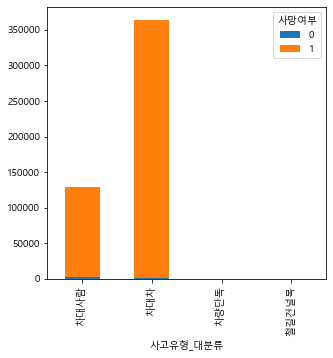

In [191]:
ct = pd.crosstab(Seoul_0719['사고유형_대분류'], Seoul_0719['사망여부'])
ct.plot.bar(stacked=True)   # seaborn lib

In [192]:
ct

사망여부,0,1
사고유형_대분류,,
차대사람,2729,126593
차대차,1646,361962
차량단독,0,4
철길건널목,0,3


In [185]:
stats.chi2_contingency(ct)

(2979.536449421681,
 0.0,
 3,
 array([[1.14778106e+03, 1.28174219e+05],
        [3.22715682e+03, 3.60380843e+05],
        [3.55014941e-02, 3.96449851e+00],
        [2.66261206e-02, 2.97337388e+00]]))

In [163]:
Seoul_0719[Seoul_0719['사고내용'] == '사망']['주야']

34        야
127       야
149       주
512       야
591       주
         ..
492468    주
492746    야
492751    야
492848    야
492856    야
Name: 주야, Length: 4375, dtype: object

In [162]:
Seoul_0719[Seoul_0719['사고내용'] == '사망']['사고내용']

34        사망
127       사망
149       사망
512       사망
591       사망
          ..
492468    사망
492746    사망
492751    사망
492848    사망
492856    사망
Name: 사고내용, Length: 4375, dtype: object

In [168]:
Seoul_0719['사고내용'].unique()

array(['중상', '경상', '사망', '부상신고'], dtype=object)

In [111]:
# 사망여부 Column 추가
survived = {'사망':1, '중상':0, '경상':0, '부상신고':0}
Seoul_0719['사망여부'] = Seoul_0719['사고내용'].map(survived)

In [96]:
Seoul_0719['']

0         23
1         44
2         25
3         19
4         43
          ..
492932    54
492933    33
492934    61
492935    18
492936    53
Name: 피해자연령, Length: 492937, dtype: int64

In [11]:
Seoul_0719.groupby('노면상태').sum()['사망여부']

노면상태
건조       3659
기타         69
서리/결빙      20
적설         14
젖음/습기     613
침수          0
해빙          0
Name: 사망여부, dtype: int64

In [119]:
age_condition = [
    (Seoul_0719['가해자연령'] < 10),
    ((Seoul_0719['가해자연령'] >= 10) & (Seoul_0719['가해자연령'] < 20)),
    ((Seoul_0719['가해자연령'] >= 20) & (Seoul_0719['가해자연령'] < 30)),
    ((Seoul_0719['가해자연령'] >= 30) & (Seoul_0719['가해자연령'] < 40)),
    ((Seoul_0719['가해자연령'] >= 40) & (Seoul_0719['가해자연령'] < 50)),
    ((Seoul_0719['가해자연령'] >= 50) & (Seoul_0719['가해자연령'] < 60)),
    ((Seoul_0719['가해자연령'] >= 60) & (Seoul_0719['가해자연령'] < 70)),
    ((Seoul_0719['가해자연령'] >= 70) & (Seoul_0719['가해자연령'] < 80)),
    ((Seoul_0719['가해자연령'] >= 80) & (Seoul_0719['가해자연령'] < 90)),
    ((Seoul_0719['가해자연령'] >= 90) & (Seoul_0719['가해자연령'] < 100)),
    (Seoul_0719['가해자연령'] >= 100)]
caselist = ['10세 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']
Seoul_0719['가해자연령대'] = np.select(age_condition, caselist)


In [120]:
from scipy.stats import chisquare

def p_value(item):
    ct = pd.crosstab(Seoul_0719[item], Seoul_0719['사망여부'])
    p_value = str(stats.chi2_contingency(ct)[1])
    
    return p_value

def make_df(item):
    li_1 = np.array(Seoul_0719.groupby(item).sum()['사망여부'])
    li_2 = np.array(Seoul_0719.groupby(item).size())
    li_3 = li_2 - li_1

    li_result = np.round((li_1 / li_2) * 100, 4)
    
    df_idx = Seoul_0719.groupby(item).size().index
    col_dict = {'사망발생 건수':li_1, '비사망발생 건수':li_3, item+'별 사고발생 건수':li_2, item+'별 사망자 비율(%)':li_result}
    df_temp = pd.DataFrame(col_dict, index=df_idx).sort_values(by=item+'별 사망자 비율(%)', ascending=False)

    return df_temp

def main():
    print("---------------------- 선택 항목 ----------------------")
    print("1. 주야            2. 노면상태             3. 기상상태")
    print("4. 가해자차종      5. 사고유형_대분류      6. 발생시간")
    print("7. 가해자법규위반")
    print("-------------------------------------------------------")

    selection = int(input('원하는 항목 선택: '))
    sel_item_dict = {1:'주야', 2:'노면상태', 3:'기상상태', 4:'가해자차종',
                    5:'사고유형_대분류', 6:'발생시간', 7:'가해자법규위반', 8:'가해자연령대'}
    
    df = make_df(sel_item_dict[selection])
    
    display(df)
    
    print('p-value: ' + p_value(sel_item_dict[selection]))
    
if __name__ == '__main__':
     main()
        
## 피해자차종 / 사고유형_중분류 / 사고유형 / 도로형태 / 피해자연령(범위) / 가해자연령(범위)

---------------------- 선택 항목 ----------------------
1. 주야            2. 노면상태             3. 기상상태
4. 가해자차종      5. 사고유형_대분류      6. 발생시간
7. 가해자법규위반
-------------------------------------------------------
원하는 항목 선택: 8


,사망발생 건수,비사망발생 건수,가해자연령대별 사고발생 건수,가해자연령대별 사망자 비율(%)
가해자연령대,,,,
90대,7,85,92,7.6087
80대,30,1313,1343,2.2338
70대,218,16799,17017,1.2811
60대,637,68789,69426,0.9175
50대,1120,121702,122822,0.9119
20대,542,62220,62762,0.8636
30대,765,89545,90310,0.8471
40대,900,108657,109557,0.8215
10대,154,18994,19148,0.8043


p-value: 2.560365732551138e-20


In [193]:
corr = Seoul_0719.corr(method='pearson')
corr

,발생일,사망자수,중상자수,경상자수,부상신고자수,가해자연령,피해자연령,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월,사망여부
발생일,1.000000,-0.011228,-0.092564,0.005442,0.064138,0.129247,0.112655,0.053271,0.103262,0.028107,-0.051821,-0.035848,0.999959,0.001418,0.011133
사망자수,-0.011228,1.000000,-0.020308,-0.064166,-0.015288,0.006572,0.063156,-0.013051,-0.275253,0.041177,0.005093,0.005724,-0.011213,-0.001528,-0.989469
중상자수,-0.092564,-0.020308,1.000000,-0.267459,-0.064064,-0.017868,0.058560,-0.013384,-0.772482,0.006239,0.008872,0.006751,-0.092462,-0.010829,0.025669
경상자수,0.005442,-0.064166,-0.267459,1.000000,-0.036278,0.017475,-0.009285,-0.050340,0.246103,-0.110792,0.014977,0.015355,0.005499,-0.006422,0.067360
부상신고자수,0.064138,-0.015288,-0.064064,-0.036278,1.000000,-0.036342,0.010596,0.000949,0.330086,0.092790,-0.006265,-0.006775,0.064030,0.011649,0.016401
가해자연령,0.129247,0.006572,-0.017868,0.017475,-0.036342,1.000000,0.008683,0.101528,-0.010764,-0.160816,-0.008468,-0.005924,0.129224,0.002052,-0.007258
피해자연령,0.112655,0.063156,0.058560,-0.009285,0.010596,0.008683,1.000000,0.067350,-0.078987,0.050984,0.002183,0.004977,0.112658,-0.000832,-0.064550
주야코드,0.053271,-0.013051,-0.013384,-0.050340,0.000949,0.101528,0.067350,1.000000,0.009502,0.079718,-0.088480,-0.054135,0.053228,0.004586,0.012935
사고내용코드,0.103262,-0.275253,-0.772482,0.246103,0.330086,-0.010764,-0.078987,0.009502,1.000000,0.037196,-0.010171,-0.008676,0.103138,0.013160,0.278182
가해자차종코드,0.028107,0.041177,0.006239,-0.110792,0.092790,-0.160816,0.050984,0.079718,0.037196,1.000000,-0.036028,-0.026196,0.027926,0.019917,-0.042132


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


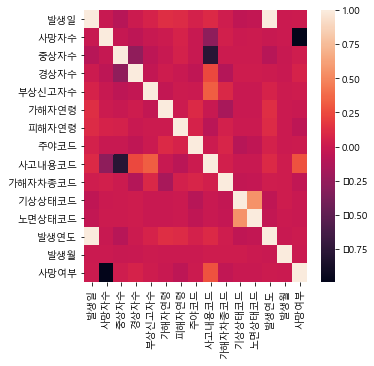

In [194]:
sns.heatmap(corr)

In [12]:
from scipy.stats import chisquare

num_class = Seoul_0719[Seoul_0719['사망자수'] >= 1]['사고유형_대분류'].value_counts()
print(num_class)
chisquare(num_class)

차대사람    2729
차대차     1646
Name: 사고유형_대분류, dtype: int64


Power_divergenceResult(statistic=268.0889142857143, pvalue=2.9609252129405383e-60)

In [11]:
Seoul_0719[Seoul_0719['사망자수'] >= 1]['사고유형_대분류'].value_counts()

차대사람    2729
차대차     1646
Name: 사고유형_대분류, dtype: int64

In [52]:
pd.crosstab(Seoul_0719['주야'], Seoul_0719['사망여부'])

사망여부,0,1
주야,,
야,2448,239687
주,1927,248875


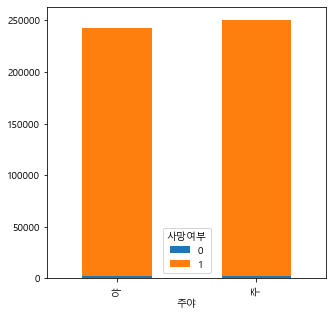

In [50]:
ct = pd.crosstab(Seoul_0719['주야'], Seoul_0719['사망여부'])
ct.plot.bar(stacked=True)

In [51]:
from scipy import stats
stats.chi2_contingency(ct)

(82.19859220527974,
 1.2307750685998935e-19,
 1,
 array([[  2149.03856882, 239985.96143118],
        [  2225.96143118, 248576.03856882]]))

In [32]:
death = Seoul_0719[Seoul_0719['사망여부'] == 0].reset_index(drop=True)

In [33]:
death

,발생일,발생시간,요일,주야,발생지_시군구,법정동명,사고내용,사망자수,중상자수,경상자수,...,피해자연령,피해자신체상해정도,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,발생연도,발생월,사망여부
0,20070101,19시,월,야,관악구,봉천동,사망,1,0,1,...,40,경상,0,0,2,1,0,2007,1,0
1,20070102,22시,화,야,강남구,일원동,사망,1,0,0,...,12,사망,0,0,3,0,0,2007,1,0
2,20070103,06시,수,주,광진구,광장동,사망,1,0,0,...,77,사망,1,0,0,0,0,2007,1,0
3,20070107,00시,일,야,도봉구,방학동,사망,1,0,0,...,51,상해없음,0,0,5,0,0,2007,1,0
4,20070108,09시,월,주,광진구,광장동,사망,1,0,0,...,69,사망,1,0,0,0,0,2007,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,20191226,16시,목,주,은평구,진관동,사망,1,0,0,...,23,사망,1,0,0,0,0,2019,12,0
4371,20191229,23시,일,야,동대문구,휘경동,사망,1,0,0,...,66,사망,0,0,0,2,2,2019,12,0
4372,20191230,00시,월,야,관악구,봉천동,사망,1,0,0,...,84,사망,0,0,0,2,2,2019,12,0
4373,20191231,01시,화,야,서초구,반포동,사망,1,0,0,...,39,사망,0,0,0,0,7,2019,12,0


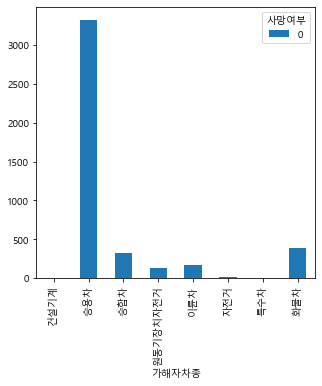

In [48]:
ct = pd.crosstab(Seoul_0719['가해자차종'], death['사망여부'])
ct.plot.bar(stacked=True)

In [49]:
stats.chi2_contingency(ct)

(0.0,
 1.0,
 0,
 array([[   8.],
        [3323.],
        [ 321.],
        [ 130.],
        [ 175.],
        [  15.],
        [  11.],
        [ 392.]]))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000240858DE5E0>,
      dtype=object)

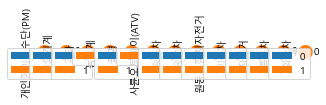

In [56]:
ct = pd.crosstab(Seoul_0719['사망여부'], Seoul_0719['가해자차종'])
ct.plot.pie(subplots=True)

In [57]:
stats.chi2_contingency(ct)

(1762.329005307077,
 0.0,
 12,
 array([[1.77507471e+00, 2.14606532e+01, 1.33130603e+00, 2.48510459e-01,
         1.31355528e+00, 2.30759712e-01, 3.08437868e+03, 2.87757360e+02,
         1.36352363e+02, 3.25335692e+02, 1.53224449e+02, 8.72449218e+00,
         3.52867101e+02],
        [1.98224925e+02, 2.39653935e+03, 1.48668694e+02, 2.77514895e+01,
         1.46686445e+02, 2.57692403e+01, 3.44436621e+05, 3.21342426e+04,
         1.52266476e+04, 3.63306643e+04, 1.71107756e+04, 9.74275508e+02,
         3.94051329e+04]]))

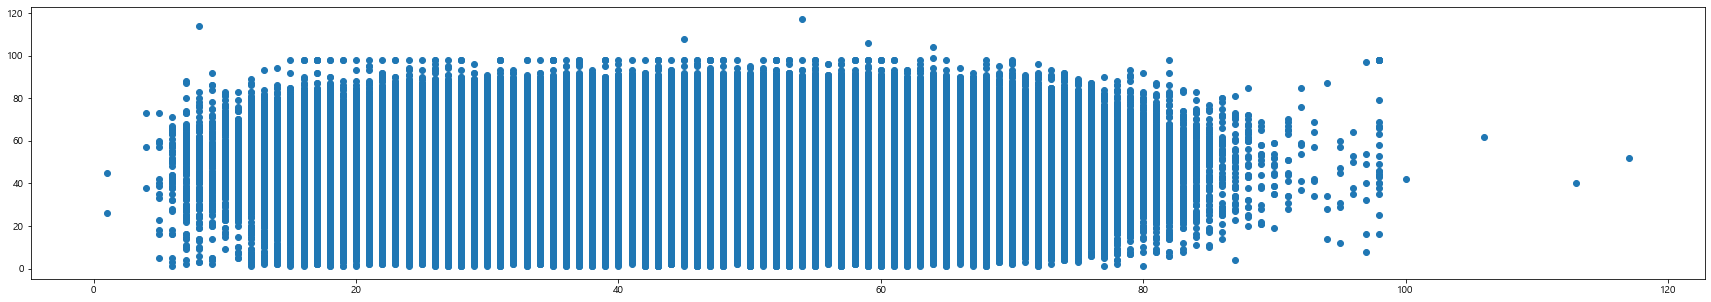

In [70]:
plt.figure(figsize=(30, 5))
plt.scatter("가해자연령", "피해자연령", data=Seoul_0719)

In [50]:
bb = pd.read_csv('bb.csv', encoding='cp949')
bb

,질병,연령,출산자,출산자_질병,비출산자,비출산자_질병
0,변비,10대,275,11,45684,537
1,변비,20대,12289,304,61702,705
2,변비,30대,29870,671,84713,128
3,변비,40대,1014,27,103417,1670


In [56]:
bb['출산자_질병비율'] = bb['출산자_질병'] / bb['출산자'] * 100
bb['비출산자_질병비율'] = bb['비출산자_질병'] / bb['비출산자'] * 100

In [57]:
bb

,질병,연령,출산자,출산자_질병,비출산자,비출산자_질병,출산자_질병비율,비출산자_질병비율
0,변비,10대,275,11,45684,537,4.000000,1.175466
1,변비,20대,12289,304,61702,705,2.473757,1.142589
2,변비,30대,29870,671,84713,128,2.246401,0.151098
3,변비,40대,1014,27,103417,1670,2.662722,1.614822


In [61]:
from scipy import stats
t, p = stats.ttest_ind(bb['비출산자_질병비율'], bb['출산자_질병비율'])

In [66]:
bb[['출산자', '출산자_질병']][0:1]

,출산자,출산자_질병
0,275,11


In [70]:
from scipy.stats import levene, ttest_ind

o = bb[['출산자', '출산자_질병']][0:1]
x = bb[['비출산자', '비출산자_질병']][0:1]
levene(4, 1.175)

TypeError: object of type 'int' has no len()